In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("listings_newyork.csv")

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,816783428767938211,Cool studio 3 min from subway!,47125955,Rebeca,Queens,Long Island City,40.761327,-73.926758,Entire home/apt,110.0,30,9,2023-09-25,0.96,2,363,9,NaN
1,8686040,LARGE MANHATTAN ONE BEDROOM,45608786,Virginia,Manhattan,Inwood,40.859990,-73.928500,Entire home/apt,NaN,30,5,2015-11-22,0.05,1,0,0,NaN
2,12426778,TH BRKLYN,7963317,Rob,Brooklyn,Boerum Hill,40.688340,-73.986010,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
3,22671517,55 washington,3428456,Yoon,Brooklyn,DUMBO,40.701490,-73.988860,Private room,NaN,30,0,NaN,NaN,1,0,0,NaN
4,35776956,luxury apt in long lsland city \n1min to subway,221012726,Lyn,Queens,Long Island City,40.749010,-73.938980,Private room,NaN,30,1,2019-07-31,0.02,1,0,0,NaN


In [4]:
data.shape

(39319, 18)

In [5]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [6]:
num_rows, num_columns = data.shape
print("Total number of records:", num_rows)
print("Total number of columns:", num_columns)

Total number of records: 39319
Total number of columns: 18


### Check Missing Values

In [7]:
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
print("\nPercentage of Missing Values:")
print(missing_percent[missing_percent > 0])

Columns with Missing Values:
name                     2
host_name                6
price                15042
last_review          11805
reviews_per_month    11805
license              34212
dtype: int64

Percentage of Missing Values:
name                  0.005087
host_name             0.015260
price                38.256314
last_review          30.023653
reviews_per_month    30.023653
license              87.011369
dtype: float64


### Handling Missing Values

In [8]:
mean_price = data['price'].mean()
data['price'].fillna(mean_price, inplace=True)

In [9]:
columns_to_drop = ['name', 'host_name', 'last_review','reviews_per_month', 'license','host_id']
data.drop(columns=columns_to_drop, inplace=True)

### Handling Outliers

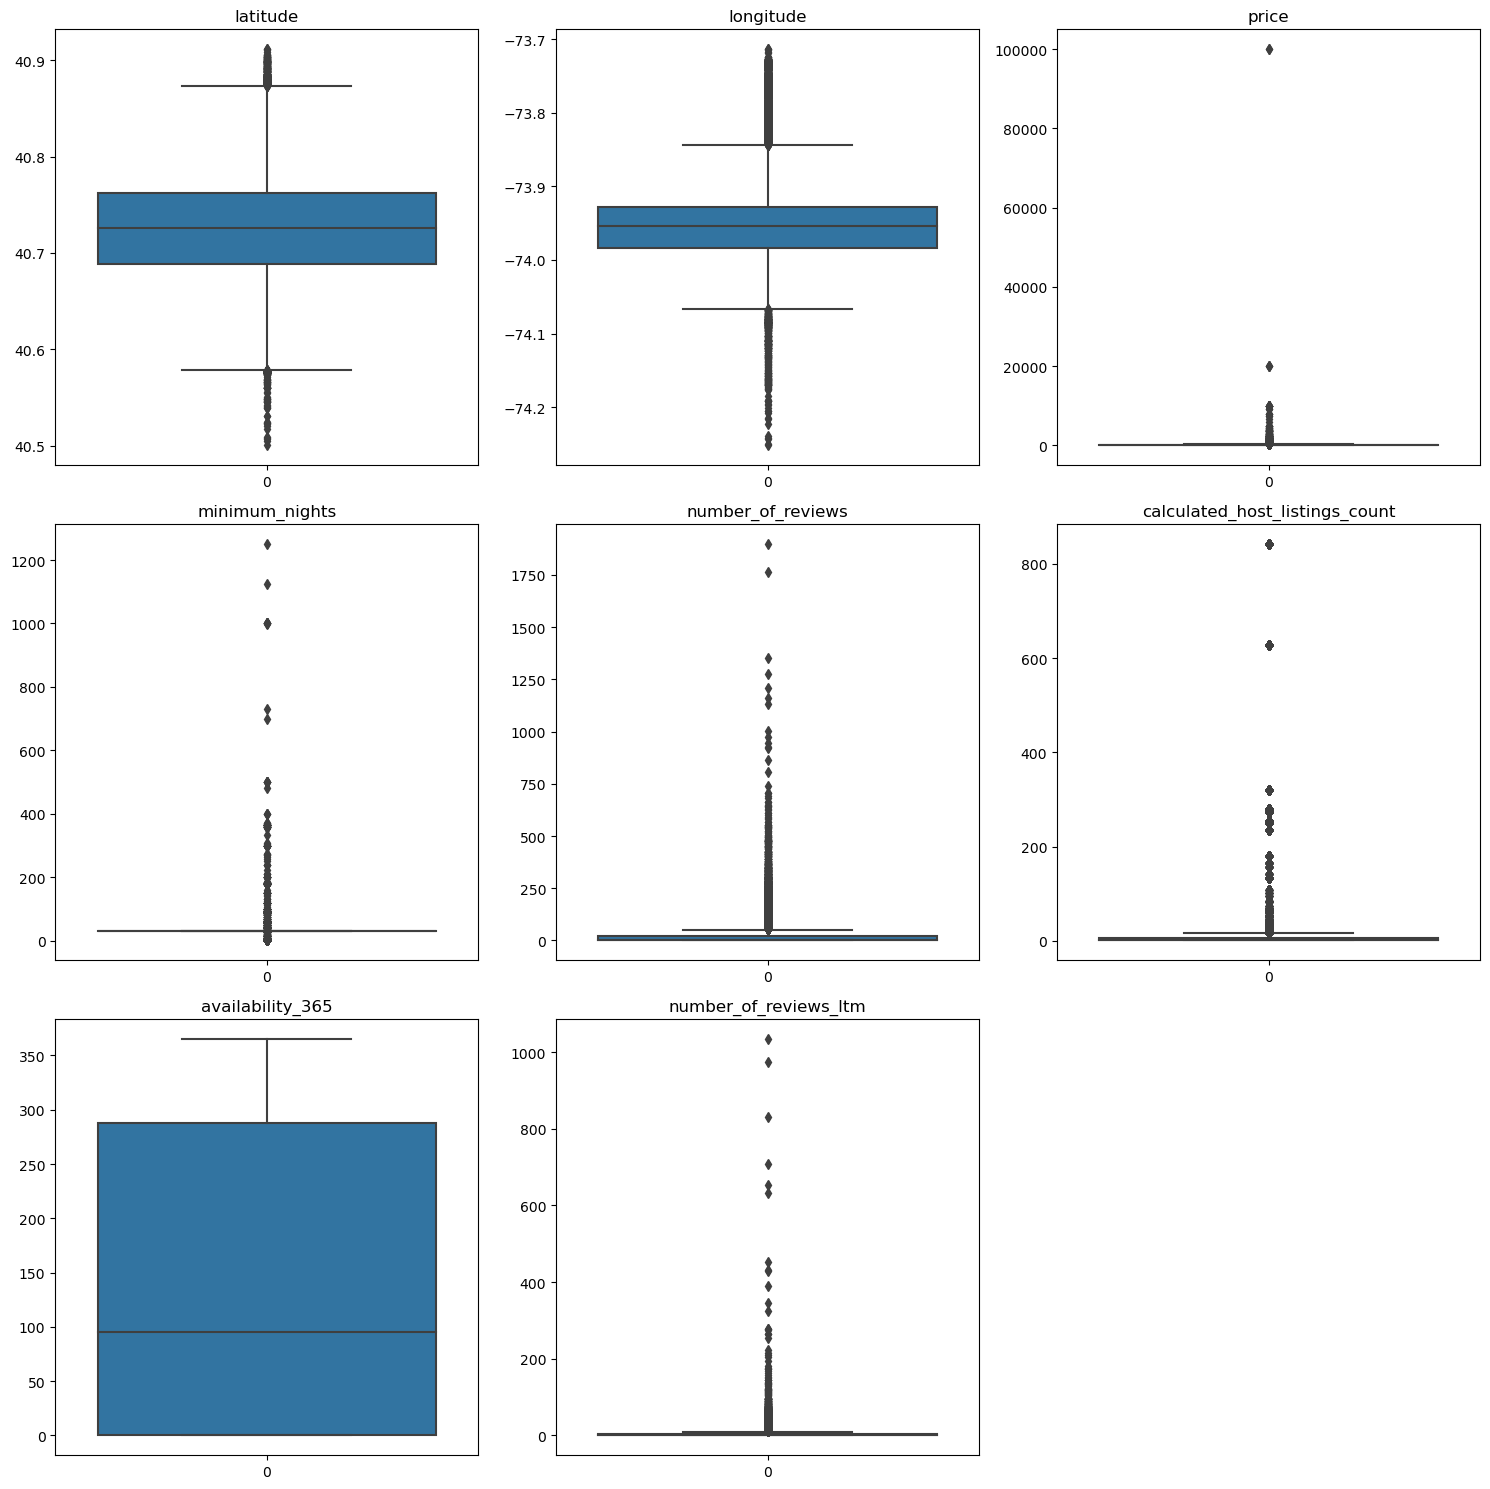

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_columns = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'id']

num_cols = len(numerical_columns)
num_rows = math.ceil(num_cols / 3)  

plt.figure(figsize=(15, 5*num_rows)) 
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 3, i) 
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [11]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        
        IQR = Q3 - Q1
    
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    return data

numerical_cols = ['latitude', 'longitude', 'price', 
                  'number_of_reviews', 'calculated_host_listings_count', 
                  'availability_365', 'number_of_reviews_ltm']

data_cleaned = remove_outliers_iqr(data,numerical_cols)

### Label Encoding

In [12]:
cols = ["neighbourhood_group", "neighbourhood", "room_type"]

def label_encode(df, columns_to_encode):
    for column in columns_to_encode:
        le = LabelEncoder()
        df.loc[:, column] = le.fit_transform(df[column])

    return df

data_cleaned = label_encode(data_cleaned, cols)

C:\Users\ramsh\AppData\Local\Temp\ipykernel_27316\639936450.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df[column])
C:\Users\ramsh\AppData\Local\Temp\ipykernel_27316\639936450.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, column] = le.fit_transform(df[column])
C:\Users\ramsh\AppData\Local\Temp\ipykernel_27316\639936450.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the

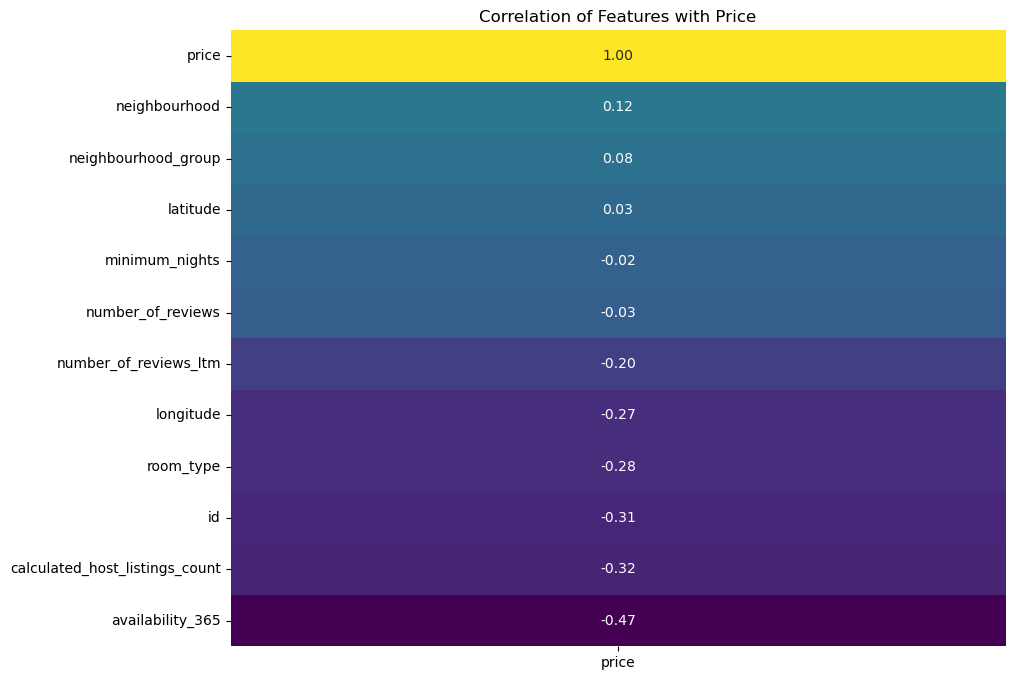

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

target_correlation = data_cleaned.corr()['price'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(target_correlation.to_frame(), cmap='viridis', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation of Features with Price')
plt.show()


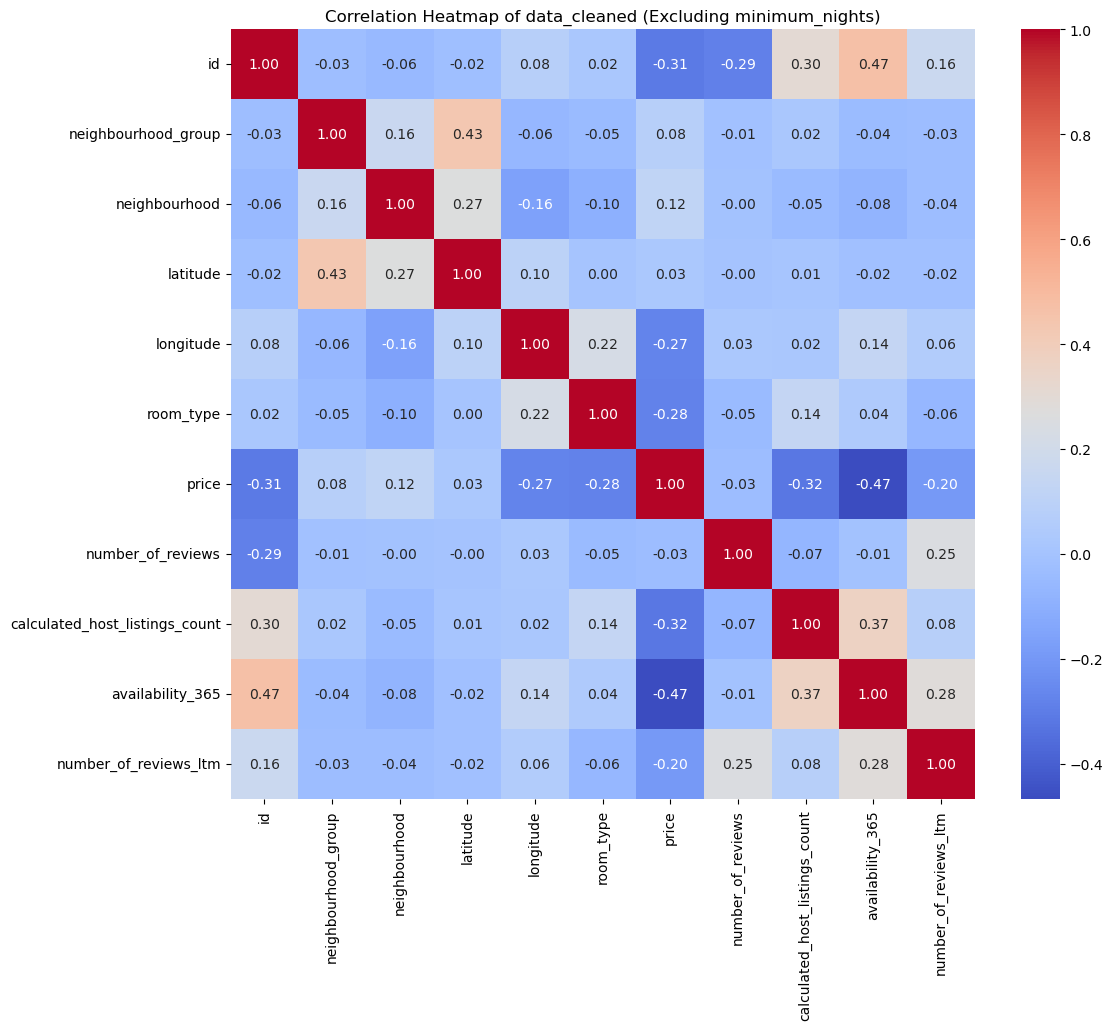

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned_excluded = data_cleaned.drop(columns=['minimum_nights'])

plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned_excluded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of data_cleaned (Excluding minimum_nights)')
plt.show()

In [15]:
data_cleaned_excluded.corr()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,-0.028642,-0.055068,-0.022432,0.080747,0.022741,-0.309314,-0.286281,0.304859,0.467261,0.164037
neighbourhood_group,-0.028642,1.000000,0.158330,0.432960,-0.061531,-0.045223,0.081378,-0.010375,0.022620,-0.039718,-0.034361
neighbourhood,-0.055068,0.158330,1.000000,0.265638,-0.162244,-0.099633,0.121399,-0.003660,-0.046900,-0.082550,-0.036249
latitude,-0.022432,0.432960,0.265638,1.000000,0.102141,0.002291,0.027439,-0.000171,0.008775,-0.018785,-0.019238
longitude,0.080747,-0.061531,-0.162244,0.102141,1.000000,0.222420,-0.273320,0.029328,0.022055,0.138854,0.058173
room_type,0.022741,-0.045223,-0.099633,0.002291,0.222420,1.000000,-0.279575,-0.048775,0.139735,0.043203,-0.063522
price,-0.309314,0.081378,0.121399,0.027439,-0.273320,-0.279575,1.000000,-0.034001,-0.322688,-0.468140,-0.198580
number_of_reviews,-0.286281,-0.010375,-0.003660,-0.000171,0.029328,-0.048775,-0.034001,1.000000,-0.072133,-0.005066,0.251786
calculated_host_listings_count,0.304859,0.022620,-0.046900,0.008775,0.022055,0.139735,-0.322688,-0.072133,1.000000,0.365126,0.079327
availability_365,0.467261,-0.039718,-0.082550,-0.018785,0.138854,0.043203,-0.468140,-0.005066,0.365126,1.000000,0.280146


In [16]:
data_cleaned = data_cleaned.drop(columns=['number_of_reviews','number_of_reviews_ltm','neighbourhood',])

In [17]:
data_cleaned.head(4).transpose()

,1,2,3,4
id,8.686040e+06,1.242678e+07,2.267152e+07,3.577696e+07
neighbourhood_group,2.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,4.085999e+01,4.068834e+01,4.070149e+01,4.074901e+01
longitude,-7.392850e+01,-7.398601e+01,-7.398886e+01,-7.393898e+01
room_type,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
price,2.052729e+02,2.052729e+02,2.052729e+02,2.052729e+02
minimum_nights,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
calculated_host_listings_count,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
availability_365,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [19]:
data_cleaned.shape

(20117, 9)

### RandomForestRegressor by sklearn

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators = 200, max_features = 'sqrt', max_depth = 20, random_state = 42)
rf_regressor.fit(X_train, y_train)

y_pred_sklearn = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_sklearn)
mae = mean_absolute_error(y_test, y_pred_sklearn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_sklearn)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2):", r2)

Mean Squared Error: 1328.4975800569366
Mean Absolute Error: 18.909232448528865
Root Mean Squared Error: 36.44856074054141
R-squared (R2): 0.6525348907524484


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error with Best Model:", mse_best)

C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\ramsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    valida

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}
Mean Squared Error with Best Model: 1328.4975800569366


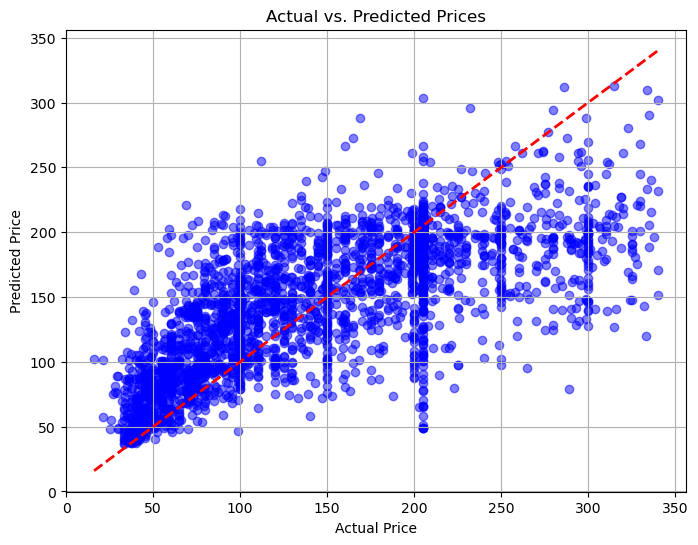

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sklearn, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  # Diagonal line
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### XGBRegressor by xgboost

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Train the XGBoost model
xgb_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred_xgb = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R2):", r2)

Mean Squared Error: 1437.1753612285981
Mean Absolute Error: 20.25315037206735
Root Mean Squared Error: 37.910095769182625
R-squared (R2): 0.6241104979086357


In [24]:
data.shape

(39319, 12)

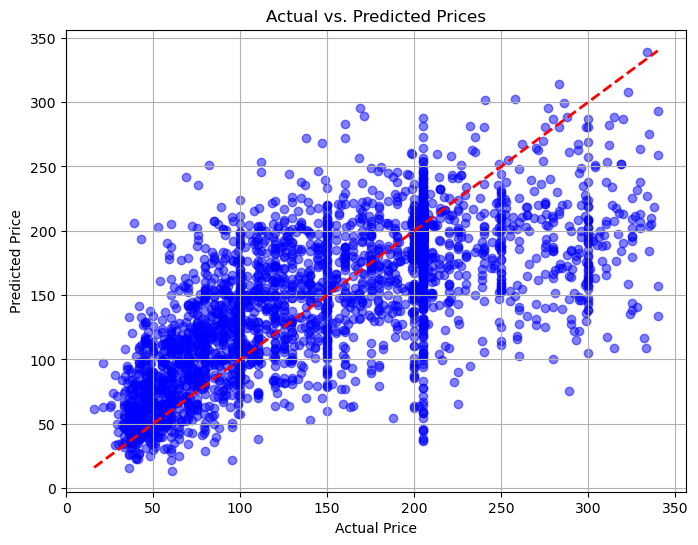

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  # Diagonal line
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### KNeighborsRegressor by sklearn

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

k = 9  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled, y_train)

y_pred_knn = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_knn)
print("R-squared (R2):", r2)

Mean Squared Error: 1713.4248604267973
Mean Absolute Error: 22.10888177909881
Root Mean Squared Error: 41.393536457118486
R-squared (R2): 0.5518581552176014


### Finding the best hyper parameters

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsRegressor(),
                               param_grid=param_grid_knn,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)

grid_search_knn.fit(X_train_scaled, y_train)

best_params_knn = grid_search_knn.best_params_
print("Best Hyperparameters for KNN:", best_params_knn)

Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = data_cleaned.drop(columns=['price'])
y = data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

best_hyperparameters_knn = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

knn_regressor = KNeighborsRegressor(**best_hyperparameters_knn)
knn_regressor.fit(X_train_scaled, y_train)

y_pred_knn = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred_knn)
print("R-squared (R2):", r2)

Mean Squared Error: 1529.8600658510786
Mean Absolute Error: 19.972000539417486
Root Mean Squared Error: 39.11342564709819
R-squared (R2): 0.5998690529104093


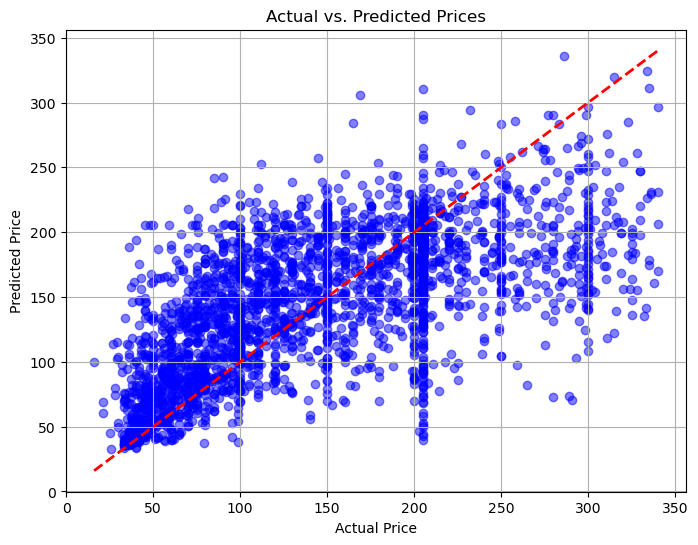

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  # Diagonal line
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()